In [713]:
import numpy as np
from numpy import mean
from numpy import median
import pandas as pd
import seaborn as sns
sns.set_theme(context='notebook',style='darkgrid',palette='deep',font='sans-serif')
import scipy.stats as stat
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from warnings import filterwarnings
filterwarnings('ignore')
import statsmodels as sm

***Problem 1: Linear Regression***


**You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.**

1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

In [2]:
df = pd.read_csv('cubic_zirconia.csv')
print('Fig. 1')
df.head()

Fig. 1


,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [3]:
print('Fig. 2\n')
df.info()

Fig. 2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [4]:
df.shape

(26967, 11)

In [5]:
df.size

296637

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [8]:
df.isna().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [806]:
print('Fig. 3')
df.describe().T

Fig. 3


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,26967.0,13484.000000,7784.846691,1.0,6742.50,13484.00,20225.50,26967.00
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [10]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

In [11]:
df['color'].unique()

array(['E', 'G', 'F', 'D', 'H', 'J', 'I'], dtype=object)

In [12]:
df['clarity'].unique()

array(['SI1', 'IF', 'VVS2', 'VS1', 'VVS1', 'VS2', 'SI2', 'I1'],
      dtype=object)

In [371]:
# inferences
# 1. Dataset has 26967 rows and 11 columns
# 2. Size of the dataset is 296637
# 3. Dataset contains 9 independant variables namely: 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'.
# 4. The dependant variables is 'price'
# 5. There are 3 independant object data types namely: 'cut', 'color' and 'clarity'
# 6. Other independant variables are float and integer data types.
# 7. There are 5 unique categories of cut namely: 'Ideal', 'Premium', 'Very Good', 'Good', and 'Fair'
# 8. 'Ideal' cut has the high occurance with frequency 10816
# 9. 'color' has 7 unique categories: 'E', 'G', 'F', 'D', 'H', 'J', 'I'
# 10. 'G' in 'color' variable has the highest occurance with a frequency of 5661
# 11. 'clarity' has 8 unique categories: 'SI1', 'IF', 'VVS2', 'VS1', 'VVS1', 'VS2', 'SI2', 'I1'
# 12. 'SI1' has the highest occurance with a frequency of 6571
# 13. There are no duplicate entry.
# 14. There are 697 missing values in 'depth' and one NAN value
# 15. There are 0 values in variables 'x', 'y', 'z'. Since these value account for less than 5% of the data we can choose to drop them from the analysis.

Fig. 4

CARAT
Skew: 1.116529961694641
Kurtosis: 1.2165976369815765


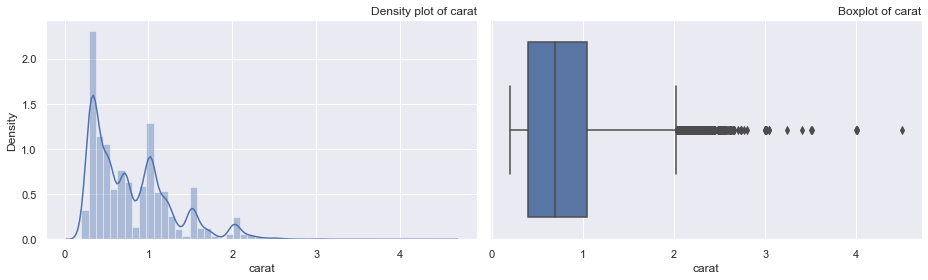

In [807]:
print('Fig. 4\n')
print('CARAT')
plt.figure(figsize=(13,4))
plt.subplot(1, 2, 1)
sns.distplot(Gem['carat'])
print('Skew:', Gem['carat'].skew())
print('Kurtosis:', Gem['carat'].kurtosis())
plt.title('Density plot of carat', loc='right')
plt.subplot(1, 2, 2)
sns.boxplot(Gem['carat'])
plt.title('Boxplot of carat', loc='right')
plt.tight_layout()
plt.show()

Fig. 5

DEPTH
Skew: -0.030972172542150473
Kurtosis: 3.85666124871465


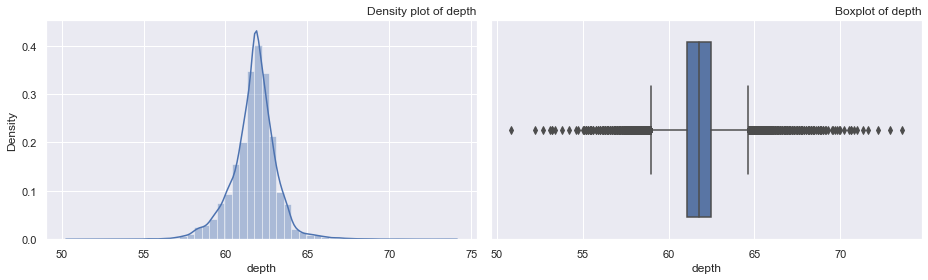

In [808]:
print('Fig. 5\n')
print('DEPTH')
plt.figure(figsize=(13,4))
plt.subplot(1, 2, 1)
sns.distplot(Gem['depth'])
print('Skew:', Gem['depth'].skew())
print('Kurtosis:', Gem['depth'].kurtosis())
plt.title('Density plot of depth', loc='right')
plt.subplot(1, 2, 2)
sns.boxplot(Gem['depth'])
plt.title('Boxplot of depth', loc='right')
plt.tight_layout()
plt.show()

Fig. 6

TABLE
Skew: 0.7649567981758517
Kurtosis: 1.5782143853014579


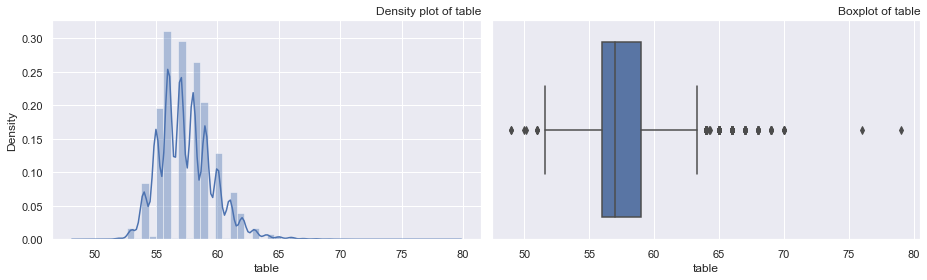

In [809]:
print('Fig. 6\n')
print('TABLE')
plt.figure(figsize=(13,4))
plt.subplot(1, 2, 1)
sns.distplot(Gem['table'])
print('Skew:', Gem['table'].skew())
print('Kurtosis:', Gem['table'].kurtosis())
plt.title('Density plot of table', loc='right')
plt.subplot(1, 2, 2)
sns.boxplot(Gem['table'])
plt.title('Boxplot of table', loc='right')
plt.tight_layout()
plt.show()

Fig. 7

X
Skew: 0.4025307828867442
Kurtosis: -0.7200474528040104


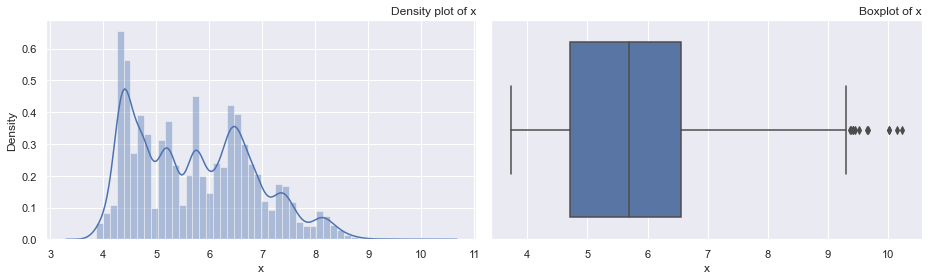

In [810]:
print('Fig. 7\n')
print('X')
plt.figure(figsize=(13,4))
plt.subplot(1, 2, 1)
sns.distplot(Gem['x'])
print('Skew:', Gem['x'].skew())
print('Kurtosis:', Gem['x'].kurtosis())
plt.title('Density plot of x', loc='right')
plt.subplot(1, 2, 2)
sns.boxplot(Gem['x'])
plt.title('Boxplot of x', loc='right')
plt.tight_layout()
plt.show()

Fig. 8

Y
Skew: 3.8799387757450696
Kurtosis: 160.23341908121958


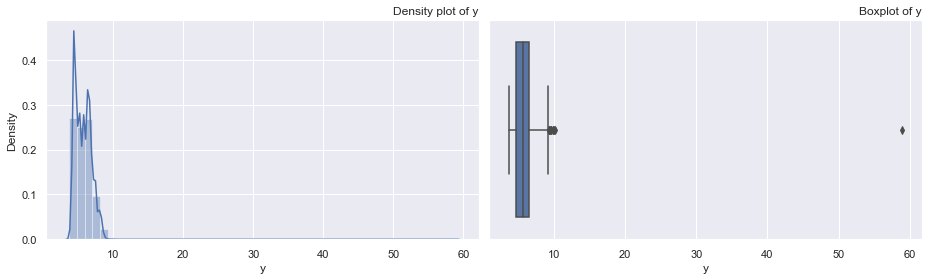

In [811]:
print('Fig. 8\n')
print('Y')
plt.figure(figsize=(13,4))
plt.subplot(1, 2, 1)
sns.distplot(Gem['y'])
print('Skew:', Gem['y'].skew())
print('Kurtosis:', Gem['y'].kurtosis())
plt.title('Density plot of y', loc='right')
plt.subplot(1, 2, 2)
sns.boxplot(Gem['y'])
plt.title('Boxplot of y', loc='right')
plt.tight_layout()
plt.show()

Fig. 9

Z
Skew: 2.634182459078135
Kurtosis: 88.22781180348457


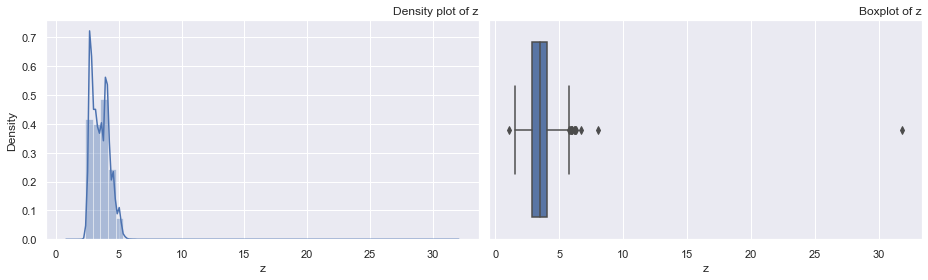

In [812]:
print('Fig. 9\n')
print('Z')
plt.figure(figsize=(13,4))
plt.subplot(1, 2, 1)
sns.distplot(Gem['z'])
print('Skew:', Gem['z'].skew())
print('Kurtosis:', Gem['z'].kurtosis())
plt.title('Density plot of z', loc='right')
plt.subplot(1, 2, 2)
sns.boxplot(Gem['z'])
plt.title('Boxplot of z', loc='right')
plt.tight_layout()
plt.show()

Fig. 10

PRICE
Skew: 1.6184324688330047
Kurtosis: 2.148839666369915


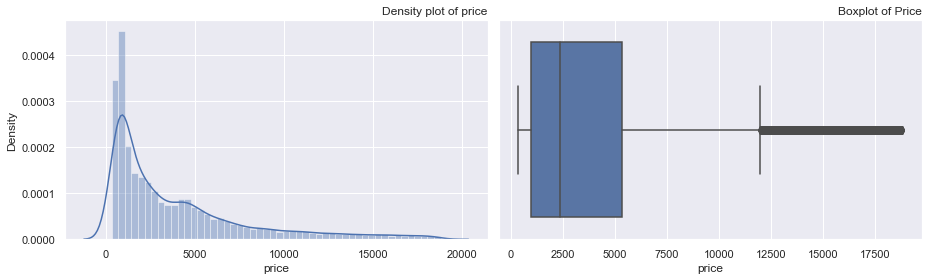

In [813]:
print('Fig. 10\n')
print('PRICE')
plt.figure(figsize=(13,4))
plt.subplot(1, 2, 1)
sns.distplot(Gem['price'])
print('Skew:', Gem['price'].skew())
print('Kurtosis:', Gem['price'].kurtosis())
plt.title('Density plot of price', loc='right')
plt.subplot(1, 2, 2)
sns.boxplot(Gem['price'])
plt.title('Boxplot of Price', loc='right')
plt.tight_layout()
plt.show()

In [32]:
# 1. Distribution of 'carat' is right skewed with a value of 1.116 and kurtosis being 1.215
# 2. Density distribution of depth is fairly symmetrical that is normal distribution of data with kurtosis value 3.674
# 3. Distribution of 'table' shows the data is slightly skewed to the right with a skewness 0.765 with sharp peaks and valley. Kurtosis is 1.582.
# 4. Distribution of 'x' shows the data has some amount of peaks and valleys which implies that the distribution is multimodal.
# 5. Distribution of 'y' is highly right skewed with sharp peaks and valleys. kurtosis is 159.3
# 6. Distribution of 'z' shows the data is highly right skewed with sharp peaks and valleys.
# 7. Distribution of 'price' is highly right skewed and hence presence of outliers are evident.

In [398]:
df_new = Gem[['carat', 'depth', 'table', 'x', 'y', 'z', 'price']]

Fig. 23
HEATMAP


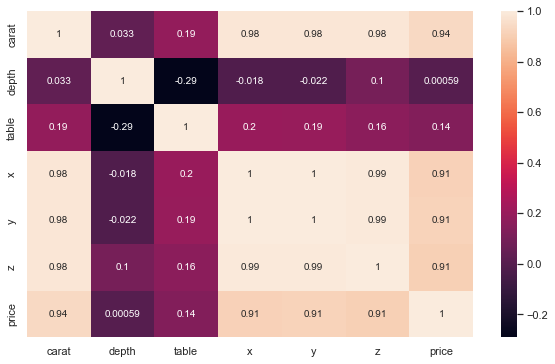

In [838]:
print('Fig. 23')
print('HEATMAP')
plt.figure(figsize=(10,6))
sns.heatmap(df_new.corr(), annot=True)
plt.show()

Fig. 22


<Figure size 432x432 with 0 Axes>

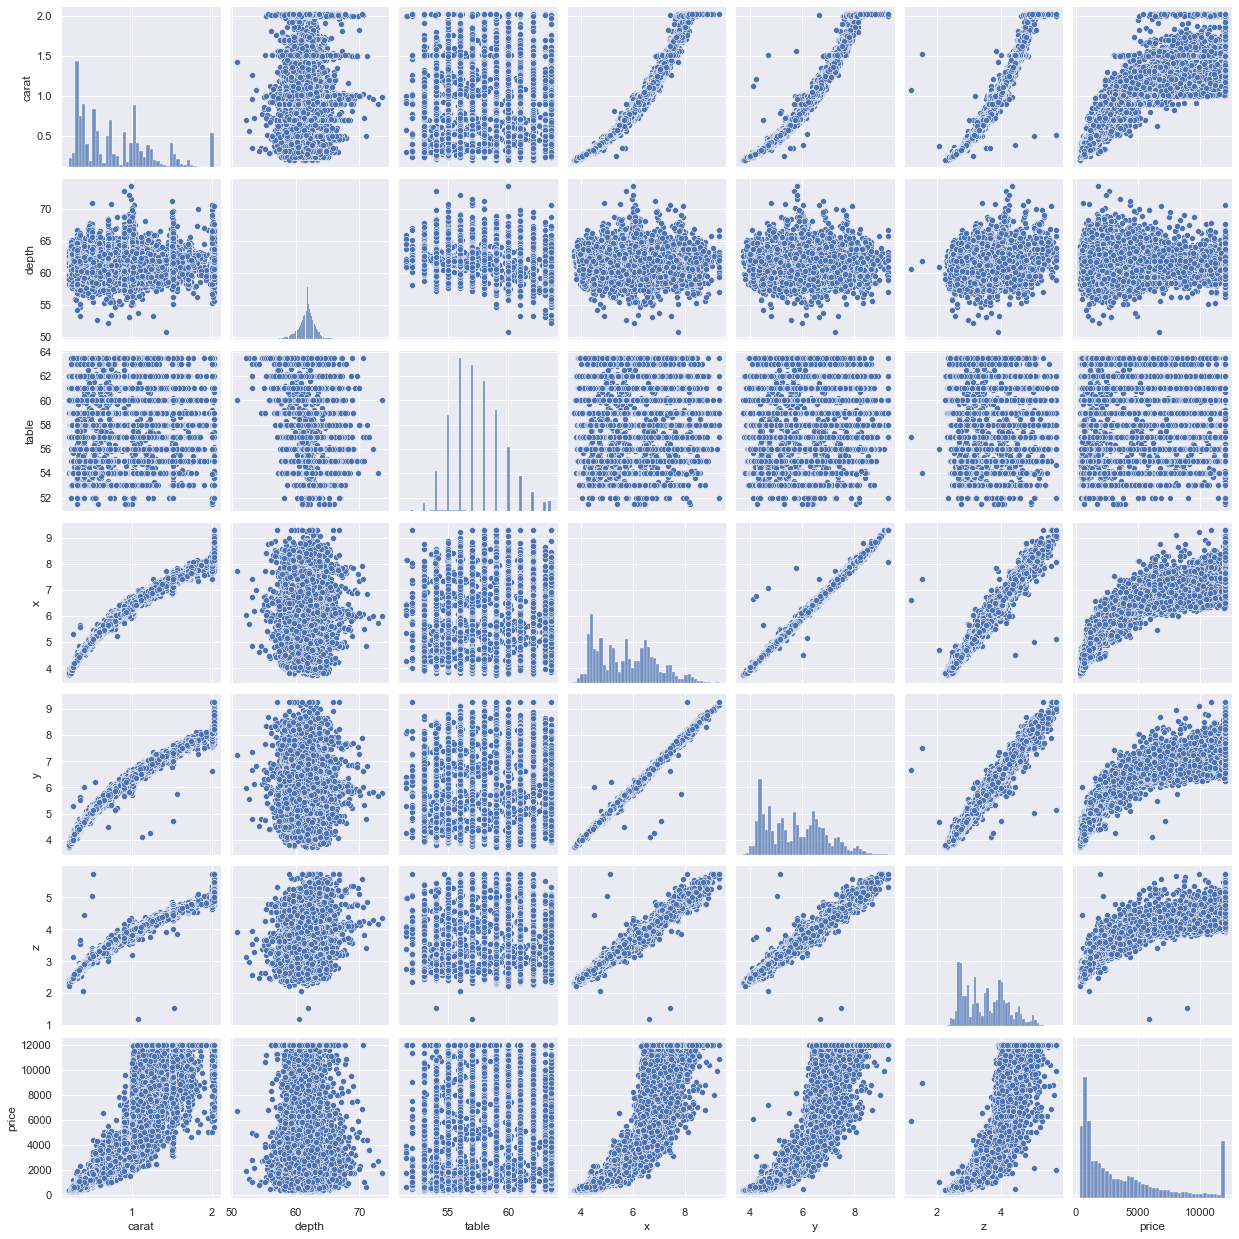

In [836]:
print('Fig. 22')
plt.figure(figsize=(6,6))
sns.pairplot(df_new)
plt.show()

In [393]:
#There is high correlation among 'price','carat', 'x', 'y' and 'z' variables

## Removing outliers 

In [397]:
Gem['depth'].fillna(value=Gem['depth'].median(), inplace=True)
Gem['depth'].unique()

array([62.1, 60.8, 62.2, 61.6, 60.4, 61.5, 63.7, 63.8, 60.5, 60.7, 61.1,
       66.2, 61.2, 59.8, 61.9, 60. , 62.9, 62.7, 61.7, 62.4, 61.4, 61.8,
       64. , 62.3, 63. , 59.9, 62.8, 61.3, 62. , 61. , 63.9, 62.6, 62.5,
       58. , 64.9, 60.9, 59.7, 63.2, 58.4, 59.4, 63.5, 63.1, 66.8, 65.2,
       60.6, 64.3, 60.2, 60.3, 65.5, 58.5, 68.3, 66.5, 63.3, 58.8, 63.6,
       63.4, 57.5, 59. , 58.7, 59.1, 64.1, 64.5, 64.4, 60.1, 57.6, 70.6,
       59.2, 59.3, 50.8, 58.9, 65.4, 58.6, 59.5, 56.7, 67. , 66. , 54.6,
       59.6, 64.7, 66.9, 64.6, 64.8, 58.2, 57.9, 56.9, 66.4, 65. , 66.6,
       57.4, 64.2, 58.1, 67.7, 55.2, 66.3, 65.3, 67.9, 67.6, 65.8, 67.1,
       65.1, 67.5, 56.6, 55.9, 57.3, 57.1, 57.8, 58.3, 65.7, 57.2, 52.7,
       56.1, 66.1, 56.3, 66.7, 54.7, 71.3, 67.3, 65.9, 71. , 57.7, 53.4,
       65.6, 56. , 68.9, 68.8, 55.3, 69.2, 53.1, 69.8, 56.5, 56.2, 55.1,
       55.5, 53.2, 56.8, 68.4, 67.8, 55.6, 67.2, 57. , 69. , 55.8, 52.2,
       53.8, 68.6, 68. , 68.7, 68.5, 70.2, 56.4, 68

In [399]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

for column in df_new.columns:
    lr,ur=remove_outlier(df[column])
    df_new[column]=np.where(df_new[column]>ur,ur,df_new[column])
    df_new[column]=np.where(df_new[column]<lr,lr,df_new[column])

Fig. 11


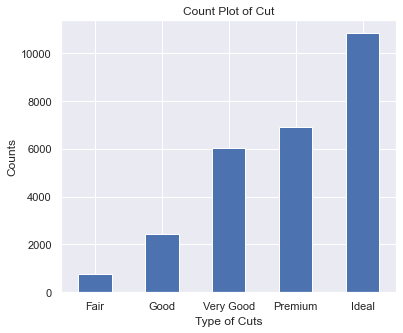

In [821]:
#Bi-Variate Analysis
plt.figure(figsize=(6,5))
print('Fig. 11')
Gem['cut'].value_counts(ascending=True).plot(kind='bar')
plt.title('Count Plot of Cut')
plt.xlabel('Type of Cuts')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.show()

Fig. 14


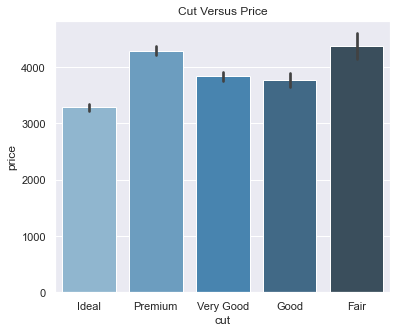

In [816]:
plt.figure(figsize=(6,5))
print('Fig. 14')
sns.barplot(Gem['cut'], df_new['price'], palette="Blues_d")
plt.title('Cut Versus Price')
plt.show()

Fig. 12


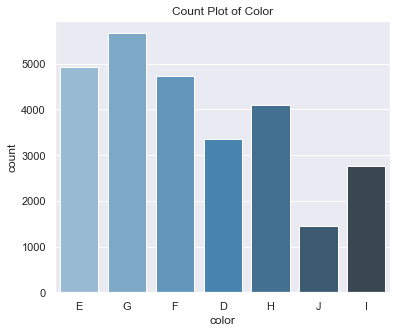

In [822]:
plt.figure(figsize=(6,5))
print('Fig. 12')
sns.countplot(Gem['color'], palette="Blues_d")
plt.title('Count Plot of Color')
plt.show()

Fig. 15


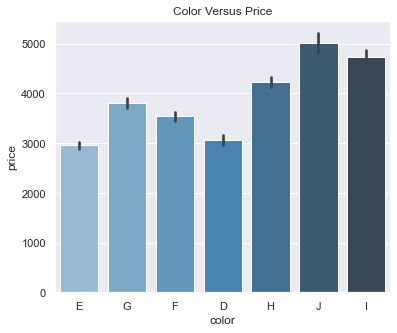

In [824]:
plt.figure(figsize=(6,5))
print('Fig. 15')
sns.barplot(Gem['color'], df_new['price'], palette="Blues_d")
plt.title('Color Versus Price')
plt.show()

Fig. 13


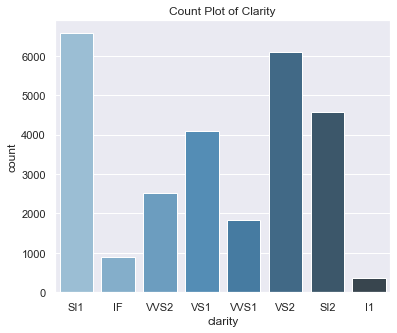

In [823]:
plt.figure(figsize=(6,5))
print('Fig. 13')
sns.countplot(Gem['clarity'], palette="Blues_d")
plt.title('Count Plot of Clarity')
plt.show()

Fig. 16


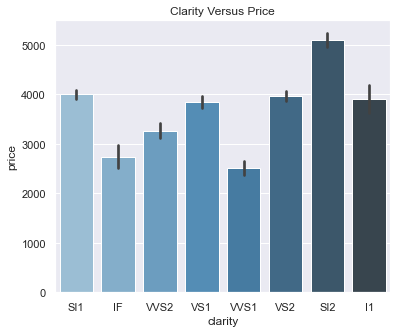

In [825]:
plt.figure(figsize=(6,5))
print('Fig. 16')
sns.barplot(Gem['clarity'], df['price'], palette="Blues_d")
plt.title('Clarity Versus Price')
plt.show()

Fig. 17


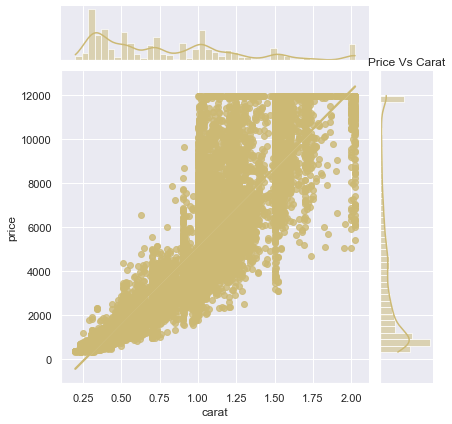

In [828]:
print('Fig. 17')
sns.jointplot(x="carat", y="price", data=df_new, kind='reg',color="y")
plt.title('Price Vs Carat')
plt.show()

Fig. 18


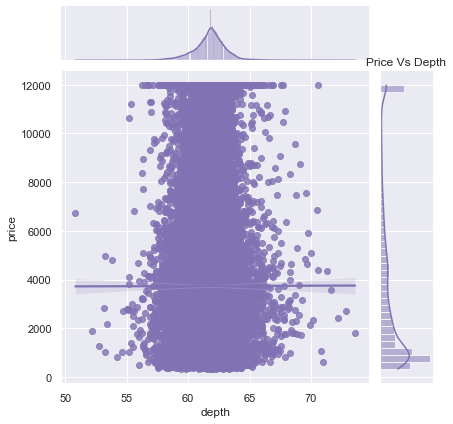

In [831]:
print('Fig. 18')
sns.jointplot(x="depth", y="price", data=df_new, kind='reg', color='m')
plt.title('Price Vs Depth')
plt.show()

Fig. 19


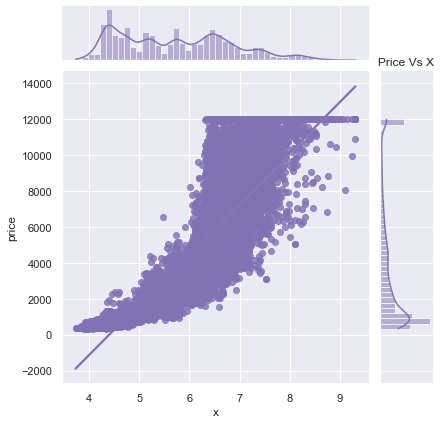

In [832]:
print('Fig. 19')
sns.jointplot(x="x", y="price", data=df_new, kind='reg', color='m')
plt.title('Price Vs X')
plt.show()

Fig. 20


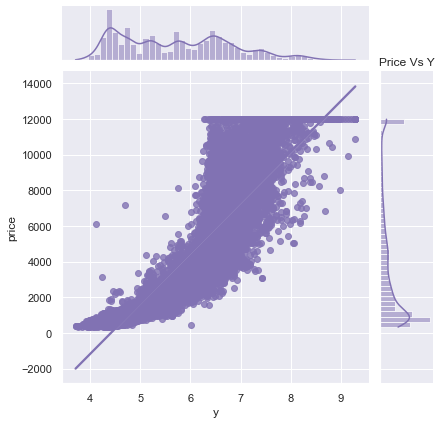

In [833]:
print('Fig. 20')
sns.jointplot(x="y", y="price", data=df_new, kind='reg', color='m')
plt.title('Price Vs Y')
plt.show()

Fig. 21


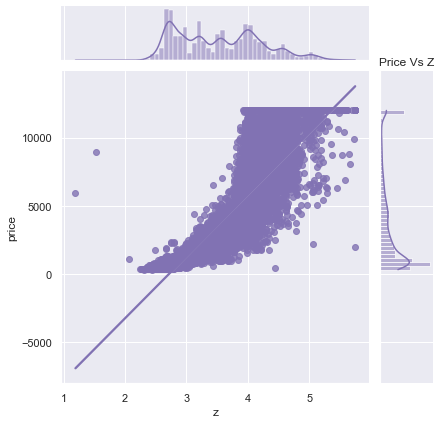

In [834]:
print('Fig. 21')
sns.jointplot(x="z", y="price", data=df_new, kind='reg', color='m')
plt.title('Price Vs Z')
plt.show()

Fig. 12


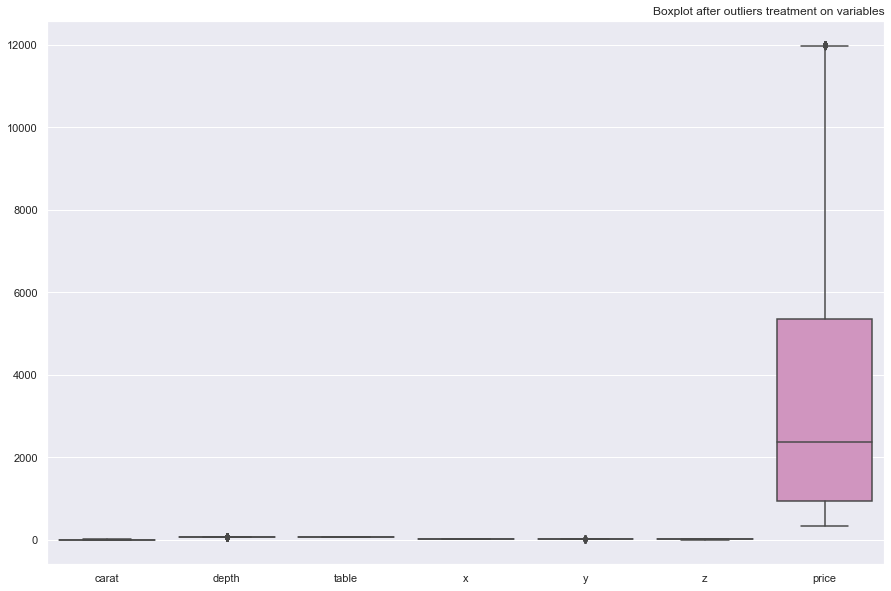

In [413]:
print('Fig. 12')
plt.figure(figsize=(15,10))
sns.boxplot(data=df_new)
plt.title('Boxplot after outliers treatment on variables', loc='right')
plt.show()

1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

In [56]:
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,26967.0,13484.000000,7784.846691,1.0,6742.50,13484.00,20225.50,26967.00
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [365]:
#There are lot of 0 values in variables: 'x', 'y', and 'z'

df[df['x']<=0]

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
5821,5822,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
6215,6216,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,17507,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [366]:
df[df['y']<=0]

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
5821,5822,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
6215,6216,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,17507,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [367]:
df[df['z']<=0]

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
5821,5822,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,6035,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6215,6216,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10827,10828,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,12499,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,12690,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,17507,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,18195,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,23759,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [368]:
Data = df.drop('Unnamed: 0', axis=1)

In [369]:
Data

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [370]:
Gem = Data.drop(index=[5821, 6034, 6215, 10827, 12498, 12689,17506,18194, 23758])

In [75]:
Gem.shape

(26958, 10)

In [76]:
Gem.reset_index(inplace=True)

In [77]:
Gem.drop('index', axis=1, inplace=True)

In [78]:
Gem

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26953,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26954,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26955,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26956,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [79]:
New_Gem = Gem.drop(['cut','color','clarity'], axis=1)

In [80]:
New_Gem

,carat,depth,table,x,y,z,price
0,0.30,62.1,58.0,4.27,4.29,2.66,499
1,0.33,60.8,58.0,4.42,4.46,2.70,984
2,0.90,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...
26953,1.11,62.3,58.0,6.61,6.52,4.09,5408
26954,0.33,61.9,55.0,4.44,4.42,2.74,1114
26955,0.51,61.7,58.0,5.12,5.15,3.17,1656
26956,0.27,61.8,56.0,4.19,4.20,2.60,682


In [81]:
Gem['depth'].fillna(value=Gem['depth'].median(), inplace=True)

In [414]:
Gem['depth'].unique()

array([62.1, 60.8, 62.2, 61.6, 60.4, 61.5, 63.7, 63.8, 60.5, 60.7, 61.1,
       66.2, 61.2, 59.8, 61.9, 60. , 62.9, 62.7, 61.7, 62.4, 61.4, 61.8,
       64. , 62.3, 63. , 59.9, 62.8, 61.3, 62. , 61. , 63.9, 62.6, 62.5,
       58. , 64.9, 60.9, 59.7, 63.2, 58.4, 59.4, 63.5, 63.1, 66.8, 65.2,
       60.6, 64.3, 60.2, 60.3, 65.5, 58.5, 68.3, 66.5, 63.3, 58.8, 63.6,
       63.4, 57.5, 59. , 58.7, 59.1, 64.1, 64.5, 64.4, 60.1, 57.6, 70.6,
       59.2, 59.3, 50.8, 58.9, 65.4, 58.6, 59.5, 56.7, 67. , 66. , 54.6,
       59.6, 64.7, 66.9, 64.6, 64.8, 58.2, 57.9, 56.9, 66.4, 65. , 66.6,
       57.4, 64.2, 58.1, 67.7, 55.2, 66.3, 65.3, 67.9, 67.6, 65.8, 67.1,
       65.1, 67.5, 56.6, 55.9, 57.3, 57.1, 57.8, 58.3, 65.7, 57.2, 52.7,
       56.1, 66.1, 56.3, 66.7, 54.7, 71.3, 67.3, 65.9, 71. , 57.7, 53.4,
       65.6, 56. , 68.9, 68.8, 55.3, 69.2, 53.1, 69.8, 56.5, 56.2, 55.1,
       55.5, 53.2, 56.8, 68.4, 67.8, 55.6, 67.2, 57. , 69. , 55.8, 52.2,
       53.8, 68.6, 68. , 68.7, 68.5, 70.2, 56.4, 68

In [417]:
G = Gem[['cut', 'color','clarity']]
G

,cut,color,clarity
0,Ideal,E,SI1
1,Premium,G,IF
2,Very Good,E,VVS2
3,Ideal,F,VS1
4,Ideal,F,VVS1
...,...,...,...
26962,Premium,G,SI1
26963,Ideal,H,IF
26964,Premium,E,VS2
26965,Very Good,F,VVS2


<AxesSubplot:xlabel='price'>

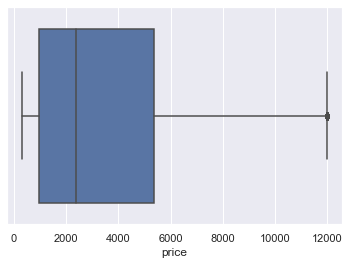

In [499]:
data_model = pd.concat([G, df_new], axis=1)
sns.boxplot(data_model['price'])

In [840]:
data_model

,cut,color,clarity,carat,depth,table,x,y,z,price
0,Ideal,E,SI1,0.30,62.1,58.0,4.27,4.29,2.66,499.0
1,Premium,G,IF,0.33,60.8,58.0,4.42,4.46,2.70,984.0
2,Very Good,E,VVS2,0.90,62.2,60.0,6.04,6.12,3.78,6289.0
3,Ideal,F,VS1,0.42,61.6,56.0,4.82,4.80,2.96,1082.0
4,Ideal,F,VVS1,0.31,60.4,59.0,4.35,4.43,2.65,779.0
...,...,...,...,...,...,...,...,...,...,...
26962,Premium,G,SI1,1.11,62.3,58.0,6.61,6.52,4.09,5408.0
26963,Ideal,H,IF,0.33,61.9,55.0,4.44,4.42,2.74,1114.0
26964,Premium,E,VS2,0.51,61.7,58.0,5.12,5.15,3.17,1656.0
26965,Very Good,F,VVS2,0.27,61.8,56.0,4.19,4.20,2.60,682.0


1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

In [841]:
df_model = pd.get_dummies(data=data_model, columns=['cut','color','clarity'])

In [181]:
Encoder = LabelEncoder()
Gem['cut'] = Encoder.fit_transform(Gem['cut'])
Gem['color'] = Encoder.fit_transform(Gem['color'])
Gem['clarity'] = Encoder.fit_transform(Gem['clarity'])

In [842]:
print('Fig. 24\n')
df_model

Fig. 24



,carat,depth,table,x,y,z,price,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,499.0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,1082.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779.0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26962,1.11,62.3,58.0,6.61,6.52,4.09,5408.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
26963,0.33,61.9,55.0,4.44,4.42,2.74,1114.0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
26964,0.51,61.7,58.0,5.12,5.15,3.17,1656.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
26965,0.27,61.8,56.0,4.19,4.20,2.60,682.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [440]:
df_model.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price', 'cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [843]:
df_model.rename(columns={'cut_Very Good': 'cut_Very_Good'}, inplace=True)

In [844]:
SC = StandardScaler()
df_model_scaled = pd.DataFrame(SC.fit_transform(df_model), columns=df_model.columns)

In [845]:
X = df_model_scaled.drop('price', axis=1)
y = df_model_scaled['price']

In [846]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [847]:
X_train.shape

(18870, 26)

In [848]:
y_train.shape

(18870,)

In [849]:
X_test.shape

(8088, 26)

In [850]:
y_test.shape

(8088,)

## Linear Regression Model

In [851]:
Model1 = LinearRegression()

In [852]:
Model1.fit(X_train, y_train)

LinearRegression()

In [853]:
enumerate(X_train.columns)

In [854]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, Model1.coef_[idx]))

The coefficient for carat is 1.236324560450127
The coefficient for depth is 0.005156789451940924
The coefficient for table is -0.01490724021050946
The coefficient for x is -0.3519106432740358
The coefficient for y is 0.33346466196472996
The coefficient for z is -0.15318547108308384
The coefficient for cut_Fair is 103412326768.63136
The coefficient for cut_Good is 176975869106.54398
The coefficient for cut_Ideal is 302390948736.90546
The coefficient for cut_Premium is 269141394371.72635
The coefficient for cut_Very_Good is 257086514447.12906
The coefficient for color_D is 862697932246.5077
The coefficient for color_E is 1010663530734.8358
The coefficient for color_F is 995206362251.2788
The coefficient for color_G is 1065766626403.514
The coefficient for color_H is 939647436615.1758
The coefficient for color_I is 794785816936.3488
The coefficient for color_J is 589076632051.9833
The coefficient for clarity_I1 is 288854488464.6061
The coefficient for clarity_IF is 448760996159.4271
The c

In [855]:
Model1.intercept_

0.0012758094379976825

In [729]:
# R-Squared for Linear Model
Model1.score(X_train, y_train)

# 94% of variation in price is explained by the predictors in the train data set

0.9419552166794602

In [730]:
Model1.score(X_test, y_test)

# 93.8% of variance in price is explained by the predictor variables in the test data set

0.9381578728526219

In [731]:
Model1.predict(X_train)

array([-0.0246031 , -0.95368025, -0.34668562, ...,  2.69707659,
        0.40215472,  1.19121722])

In [732]:
from sklearn import metrics
from sklearn.linear_model import Ridge

In [733]:
np.sqrt(metrics.mean_squared_error(y_train, Model1.predict(X_train)))


0.23992845126164694

In [857]:
np.sqrt(metrics.mean_squared_error(y_test, Model1.predict(X_test)))

0.25105075106479136

In [734]:
Model2 = Ridge(alpha=1.0, max_iter=1000, tol=0.001)

In [735]:
Model2.fit(X_train, y_train)

Ridge(max_iter=1000)

In [736]:
Model2.score(X_test, y_test)

0.9381588169652293

In [737]:
Model2.coef_

array([ 1.23377242,  0.00520761, -0.01503488, -0.33890293,  0.32304841,
       -0.15372731, -0.02596535, -0.01234525,  0.01142256,  0.00799024,
       -0.00285754,  0.05148029,  0.03924087,  0.03173081,  0.01604358,
       -0.03036509, -0.06657824, -0.0870867 , -0.09621827,  0.05839211,
       -0.03969669, -0.12581635,  0.0496705 ,  0.02296603,  0.06533536,
        0.07194887])

## Stats Model

In [864]:
formula = 'price ~ carat + table + depth + x + y + z + cut_Fair + cut_Ideal + cut_Premium + cut_Good + cut_Very_Good + color_D + color_E + color_F + color_G + color_H + color_I + color_J + clarity_I1 + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2'

In [865]:
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)

In [866]:
Model3 = smf.ols(formula= formula, data=data_train).fit()

In [868]:
print(Model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 1.330e+04
Date:                Sat, 26 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:02:13   Log-Likelihood:                 160.63
No. Observations:               18870   AIC:                            -273.3
Df Residuals:                   18846   BIC:                            -84.97
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0014      0.002      0.817

In [869]:
# p_value for depth indicates that there is 18% chance that it has no effect on the dependant variable price.Therefore, dropping these variable from modelling.

In [871]:
print("The amount of variation in the Target variable is explained by the independant variable is:",Model3.rsquared*100, "%")

The amount of variation in the Target variable is explained by the independant variable is: 94.19594405839032 %


In [872]:
formula = 'price ~ carat + table + x + y + z + cut_Fair + cut_Ideal + cut_Very_Good + cut_Premium + cut_Good + color_D + color_E + color_F + color_G + color_H + color_I + color_J + clarity_I1 + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2'

In [873]:
Model33 = smf.ols(formula=formula, data=data_train).fit()

In [874]:
print(Model33.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 1.390e+04
Date:                Sat, 26 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:06:23   Log-Likelihood:                 159.73
No. Observations:               18870   AIC:                            -273.5
Df Residuals:                   18847   BIC:                            -93.02
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0014      0.002      0.817

In [875]:
print("The amount of variation in the Target variable is explained by the independant variable is:",Model33.rsquared*100, "%")

The amount of variation in the Target variable is explained by the independant variable is: 94.19539175359294 %


In [899]:
Model33.params.sort_values(ascending=False)

carat            1.237651
y                0.315902
clarity_VVS2     0.071894
clarity_VVS1     0.065214
clarity_IF       0.058289
color_D          0.051481
clarity_VS1      0.049644
color_E          0.039217
color_F          0.031729
clarity_VS2      0.022986
color_G          0.016066
cut_Ideal        0.011172
cut_Premium      0.008013
Intercept        0.001428
cut_Very_Good   -0.002911
cut_Good        -0.012111
table           -0.015622
cut_Fair        -0.025563
color_H         -0.030355
clarity_SI1     -0.039578
color_I         -0.066568
color_J         -0.087115
clarity_I1      -0.096144
z               -0.122669
clarity_SI2     -0.125800
x               -0.366492
dtype: float64

In [882]:
y_pred = Model33.predict(X_test)
y_pred

26800    0.311417
10084    0.280635
22809   -0.698669
21668   -0.176535
14840    0.874952
           ...   
25794   -0.085285
8916     0.924838
19040    1.640309
2456     2.598434
2266    -0.898376
Length: 8088, dtype: float64

In [884]:
Model33.fittedvalues

7595    -0.028550
8879    -0.956229
22755   -0.352180
6640    -0.803279
18693    1.736199
           ...   
10955    0.074759
17289   -0.248305
5192     2.700729
12172    0.403412
235      1.188795
Length: 18870, dtype: float64

In [886]:
print('The Root Mean Squared Error(RMSE) of training data set is :', mean_squared_error(Model33.fittedvalues, y_train, squared=False))

The Root Mean Squared Error(RMSE) of training data set is : 0.2399311362553137


In [888]:
print('The Root Mean Squared Error(RMSE) of test data set is :', mean_squared_error(y_test, y_pred, squared=False))

The Root Mean Squared Error(RMSE) of test data set is : 0.2510970280112161


In [895]:
#Pred on Test data
y_pred = Model33.predict(data_test)

In [896]:
Model33.rsquared

0.9419539175359295

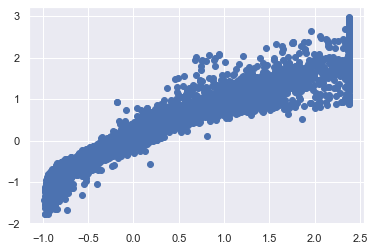

In [893]:
plt.scatter(y_test, y_pred)
plt.show()

In [894]:
for i,j in np.array(Model33.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(0.0) * Intercept + (1.24) * carat + (-0.02) * table + (-0.37) * x + (0.32) * y + (-0.12) * z + (-0.03) * cut_Fair + (0.01) * cut_Ideal + (-0.0) * cut_Very_Good + (0.01) * cut_Premium + (-0.01) * cut_Good + (0.05) * color_D + (0.04) * color_E + (0.03) * color_F + (0.02) * color_G + (-0.03) * color_H + (-0.07) * color_I + (-0.09) * color_J + (-0.1) * clarity_I1 + (0.06) * clarity_IF + (-0.04) * clarity_SI1 + (-0.13) * clarity_SI2 + (0.05) * clarity_VS1 + (0.02) * clarity_VS2 + (0.07) * clarity_VVS1 + (0.07) * clarity_VVS2 + 

In [877]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [878]:
X = df_model.drop('price', axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26958 entries, 0 to 26966
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          26958 non-null  float64
 1   depth          26958 non-null  float64
 2   table          26958 non-null  float64
 3   x              26958 non-null  float64
 4   y              26958 non-null  float64
 5   z              26958 non-null  float64
 6   cut_Fair       26958 non-null  uint8  
 7   cut_Good       26958 non-null  uint8  
 8   cut_Ideal      26958 non-null  uint8  
 9   cut_Premium    26958 non-null  uint8  
 10  cut_Very_Good  26958 non-null  uint8  
 11  color_D        26958 non-null  uint8  
 12  color_E        26958 non-null  uint8  
 13  color_F        26958 non-null  uint8  
 14  color_G        26958 non-null  uint8  
 15  color_H        26958 non-null  uint8  
 16  color_I        26958 non-null  uint8  
 17  color_J        26958 non-null  uint8  
 18  clarit

In [879]:
calc_vif(X)

,variables,VIF
0,carat,33.461479
1,depth,5.738915
2,table,1.803031
3,x,484.387109
4,y,490.032442
5,z,301.908876
6,cut_Fair,inf
7,cut_Good,inf
8,cut_Ideal,inf
9,cut_Premium,inf


In [260]:
#High VIF Indicate that multicolinearity exists.


## Holiday package

Problem 2: Logistic Regression and LDA


You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

In [900]:
hp = pd.read_csv('Holiday_Package.csv')
print('Fig. 25')
hp.head()

Fig. 25


,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [904]:
hp.drop('Unnamed: 0', axis=1, inplace=True)

In [905]:
print('Fig. 26')
hp.info()

Fig. 26
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [906]:
hp.duplicated().sum()

0

In [907]:
hp.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [908]:
print('Fig. 27')
hp.describe().T

Fig. 27


,count,mean,std,min,25%,50%,75%,max
Salary,872.0,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0


<AxesSubplot:>

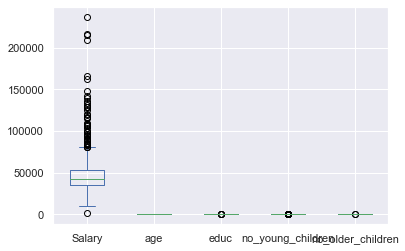

In [290]:
hp.plot(kind='box')

In [291]:
# 1. Dataset has 872 entries ard 7 coloumns
# 2. There are no duplicate entries in the data set.
# 3. There are 6 predictor variables namely: 'salary', 'age', 'educ', 'no_young_children','no_older_children' and 'foreign'
# 4. Our Target variable is 'Holiday_Package'
# 5. 5 predictors are of integer datatype and 1 predictor is object data type.
# 6. Data are no missing values in the data set.
# 7. Mean values are somewhat similar to median values.
# 8. There are outliers present in the data set.
# 9. There are extreme values present in 'Salary'.


## Univariate Analysis

Fig. 28 

SALARY
Skew: 3.103215542323346
Kurtosis: 15.852557381766497


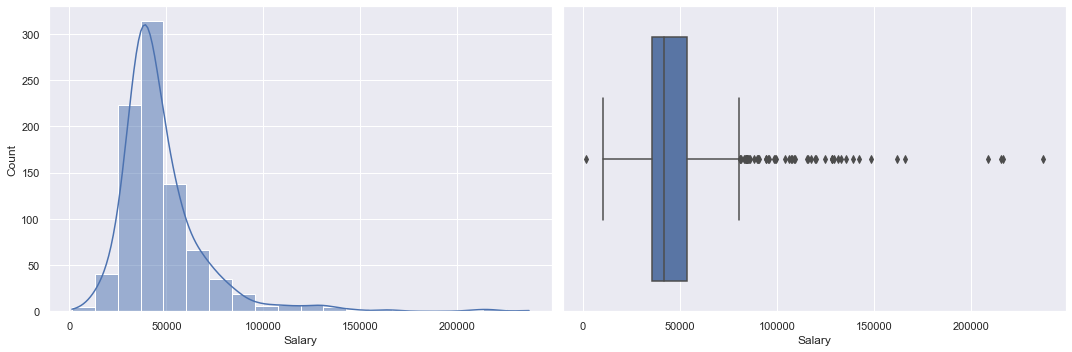

In [910]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.histplot(hp['Salary'], bins=20, kde=True)
print('Fig. 28 \n')
print('SALARY')
print('Skew:',hp['Salary'].skew())
print('Kurtosis:',hp['Salary'].kurtosis())
plt.xlabel('Salary')
plt.subplot(1, 2, 2)
sns.boxplot(hp['Salary'])
plt.tight_layout()
plt.show()

Fig. 29

AGE
Skew: 0.1464120059496387
Kurtosis: -0.9099619032627548


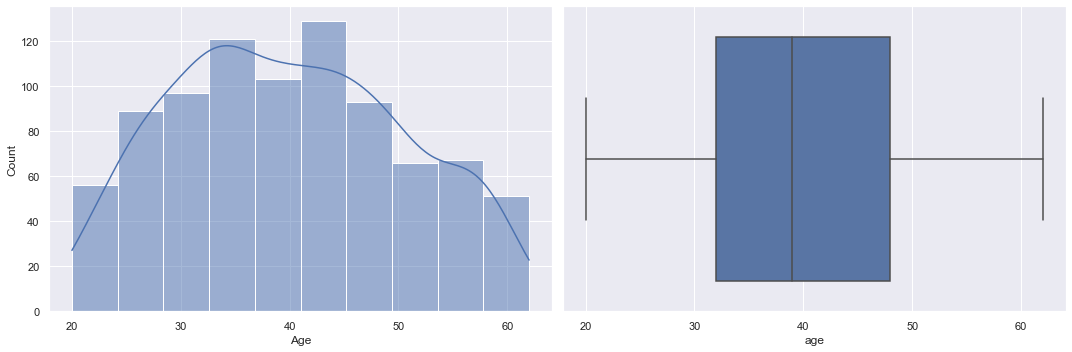

In [911]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.histplot(hp['age'], bins=10, kde=True)
print('Fig. 29\n')
print('AGE')
print('Skew:',hp['age'].skew())
print('Kurtosis:',hp['age'].kurtosis())
plt.xlabel('Age')
plt.subplot(1, 2, 2)
sns.boxplot(hp['age'])
plt.tight_layout()
plt.show()

Fig. 30

YEARS OF FORMAL EDUCATION
Skew: -0.045501475549558336
Kurtosis: 0.005557800972398663


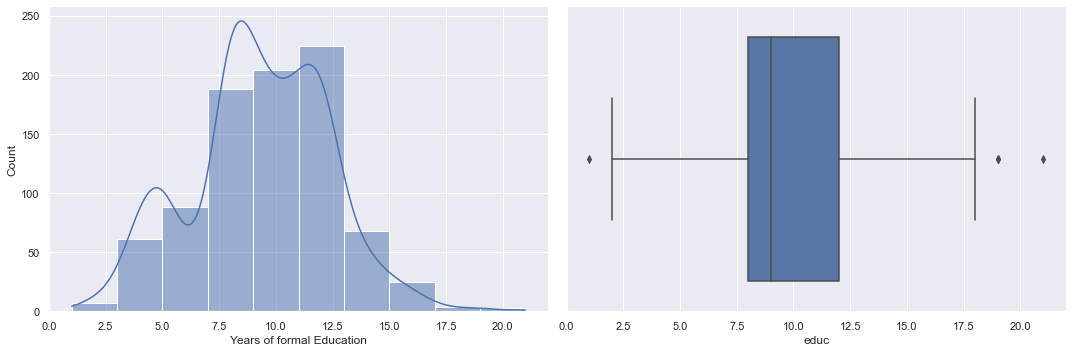

In [912]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.histplot(hp['educ'], bins=10, kde=True)
print('Fig. 30\n')
print('YEARS OF FORMAL EDUCATION')
print('Skew:',hp['educ'].skew())
print('Kurtosis:',hp['educ'].kurtosis())
plt.xlabel('Years of formal Education')
plt.subplot(1, 2, 2)
sns.boxplot(hp['educ'])
plt.tight_layout()
plt.show()

Fig. 31

NO YOUNG CHILDREN
Skew: 1.946514578433618
Kurtosis: 3.1098924348766492


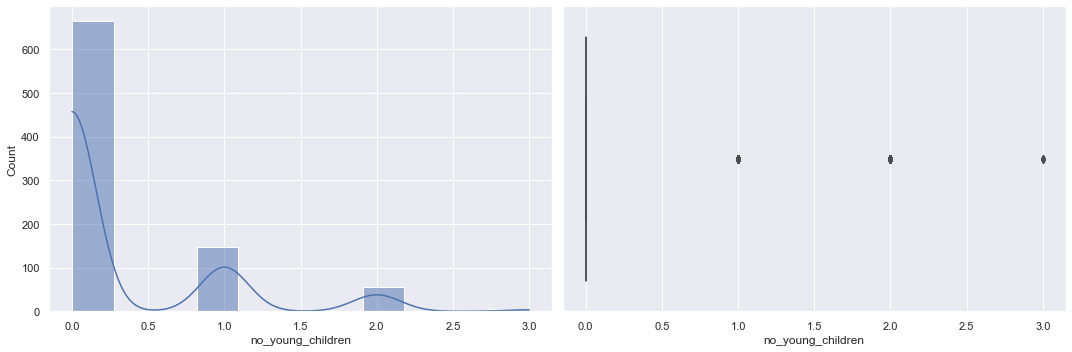

In [913]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.histplot(hp['no_young_children'], kde=True)
print('Fig. 31\n')
print('NO YOUNG CHILDREN')
print('Skew:',hp['no_young_children'].skew())
print('Kurtosis:',hp['no_young_children'].kurtosis())
plt.xlabel('no_young_children')
plt.subplot(1, 2, 2)
sns.boxplot(hp['no_young_children'])
plt.tight_layout()
plt.show()

Fig. 31

NO OLDER CHILDREN
Skew: 0.9539514741197574
Kurtosis: 0.6760174162947128


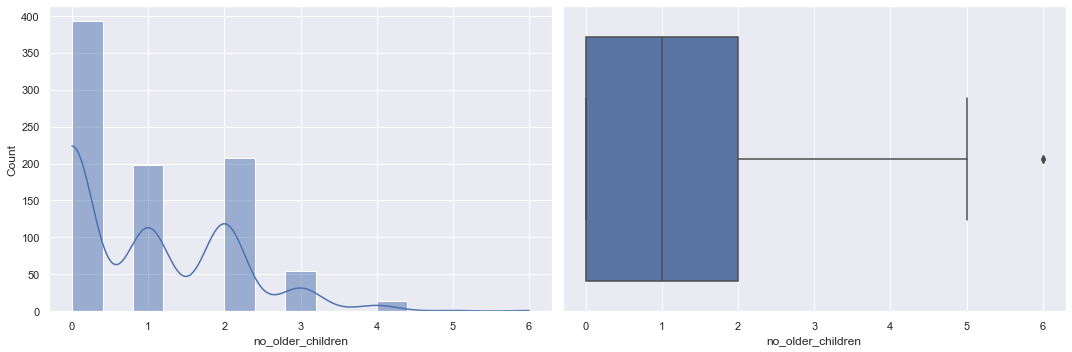

In [914]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.histplot(hp['no_older_children'], kde=True)
print('Fig. 31\n')
print('NO OLDER CHILDREN')
print('Skew:',hp['no_older_children'].skew())
print('Kurtosis:',hp['no_older_children'].kurtosis())
plt.xlabel('no_older_children')
plt.subplot(1, 2, 2)
sns.boxplot(hp['no_older_children'])
plt.tight_layout()
plt.show()

## Inferences

In [ ]:
# 1. 

## Bivariate Analysis

Fig. 32
PAIR-PLOT


<Figure size 576x432 with 0 Axes>

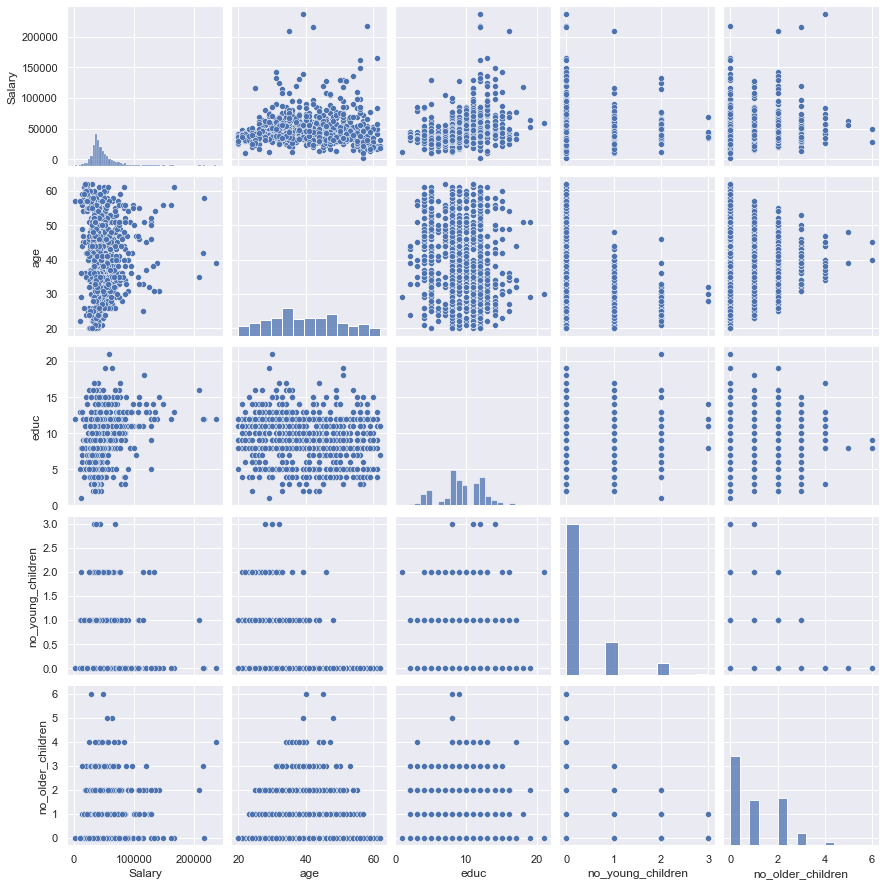

In [916]:
print('Fig. 32')
print('PAIR-PLOT')
plt.figure(figsize=(8,6))
sns.pairplot(hp, kind='scatter')
plt.show()

In [577]:
corr = hp[['Salary', 'age', 'educ', 'no_young_children', 'no_older_children']]

Fig. 33
HEATMAP


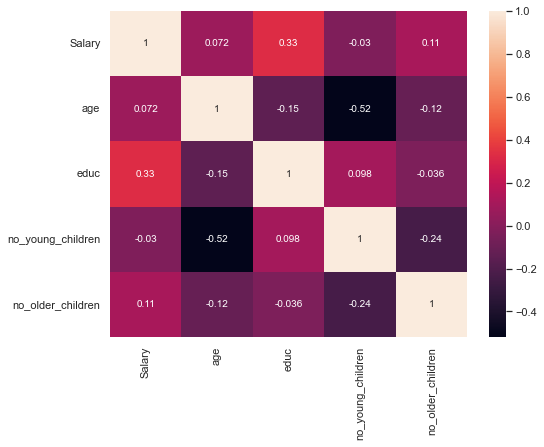

In [919]:
print('Fig. 33')
print('HEATMAP')
plt.figure(figsize=(8,6))
sns.heatmap(data=corr.corr(), annot=True)
plt.show()

<Figure size 720x720 with 0 Axes>

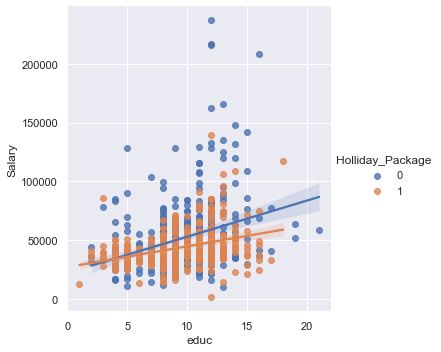

In [1012]:
plt.figure(figsize=(10,10))
sns.lmplot(x='educ', y='Salary', data=hp, hue='Holliday_Package', fit_reg=True);

<Figure size 720x720 with 0 Axes>

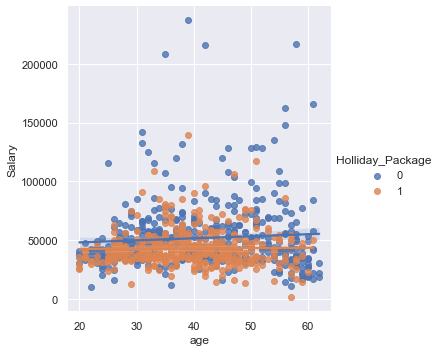

In [1015]:
plt.figure(figsize=(10,10))
sns.lmplot(x='age', y='Salary', data=hp, hue='Holliday_Package', fit_reg=True);

<Figure size 720x720 with 0 Axes>

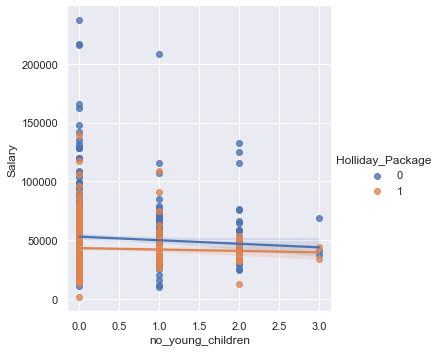

In [1017]:
plt.figure(figsize=(10,10))
sns.lmplot(x='no_young_children', y='Salary', data=hp, hue='Holliday_Package', fit_reg=True);

<Figure size 720x720 with 0 Axes>

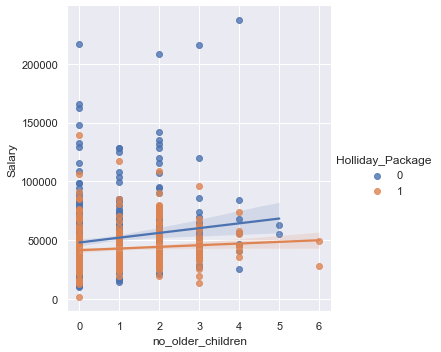

In [1018]:
plt.figure(figsize=(10,10))
sns.lmplot(x='no_older_children', y='Salary', data=hp, hue='Holliday_Package', fit_reg=True);

In [588]:
##There isn't much correlation among the independant variables.

2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [921]:
LE = LabelEncoder()

In [922]:
hp['Holliday_Package'] = LE.fit_transform(hp['Holliday_Package'])
hp['foreign'] = LE.fit_transform(hp['foreign'])

In [923]:
hp.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


In [924]:
X = hp.drop('Holliday_Package', axis=1)
y = hp['Holliday_Package']

In [925]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [926]:
LogisticModel = LogisticRegression(n_jobs=-1, max_iter=1000, verbose=True)

In [927]:
LogisticModel.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.6s finished


LogisticRegression(max_iter=1000, n_jobs=-1, verbose=True)

In [928]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix

In [929]:
y_train_pred = LogisticModel.predict(X_train)
y_test_pred = LogisticModel.predict(X_test)

In [930]:
confusion_matrix(y_train, y_train_pred)

array([[294,  32],
       [261,  23]], dtype=int64)

In [931]:
confusion_matrix(y_test, y_test_pred)

array([[129,  16],
       [107,  10]], dtype=int64)

In [932]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.53      0.90      0.67       326
           1       0.42      0.08      0.14       284

    accuracy                           0.52       610
   macro avg       0.47      0.49      0.40       610
weighted avg       0.48      0.52      0.42       610



In [933]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.55      0.89      0.68       145
           1       0.38      0.09      0.14       117

    accuracy                           0.53       262
   macro avg       0.47      0.49      0.41       262
weighted avg       0.47      0.53      0.44       262



In [934]:
from sklearn.model_selection import GridSearchCV

In [935]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs','liblinear'],
      'tol':[0.0001,0.00001]}

In [936]:
Grid = GridSearchCV(estimator=LogisticModel, param_grid=grid, cv=3, scoring='f1')

In [937]:
Grid.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1

[LibLinear]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=1000, n_jobs=-1,
                                          verbose=True),
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['sag', 'lbfgs', 'liblinear'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [938]:
Grid.best_estimator_

LogisticRegression(max_iter=1000, n_jobs=-1, solver='liblinear', tol=1e-05,
                   verbose=True)

In [939]:
RegModel = LogisticRegression(max_iter=1000, n_jobs=-1, solver='liblinear', tol=0.00001, verbose=True)

In [940]:
RegModel.fit(X_train, y_train)

[LibLinear]

LogisticRegression(max_iter=1000, n_jobs=-1, solver='liblinear', tol=1e-05,
                   verbose=True)

In [957]:
y_train_pred = RegModel.predict(X_train)
y_test_pred = RegModel.predict(X_test)

In [958]:
print('Fig. 34\n')
print('Classification Report of Train Data')
print('')
print(classification_report(y_train, y_train_pred))
print('')
print('Confusion Matrix of Train Data')
confusion_matrix(y_train,y_train_pred)

Fig. 34

Classification Report of Train Data

              precision    recall  f1-score   support

           0       0.67      0.77      0.71       326
           1       0.68      0.56      0.61       284

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.67       610


Confusion Matrix of Train Data


array([[250,  76],
       [125, 159]], dtype=int64)

Fig. 35
AUC: 0.743


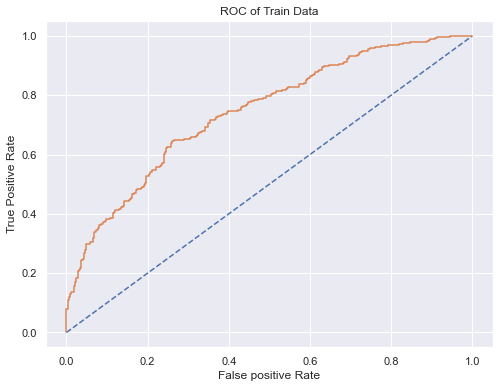

In [973]:
# predict probabilities
print('Fig. 35')
probs = RegModel.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.ylabel('True Positive Rate')
plt.xlabel('False positive Rate')
plt.title('ROC of Train Data')
plt.plot(train_fpr, train_tpr);

In [960]:
print('Fig. 36\n')
print('Classification Report of Test Data')
print('')
print(classification_report(y_test, y_test_pred))
print('')
print('Confusion Matrix of Test Data')
confusion_matrix(y_test,y_test_pred)

Fig. 36

Classification Report of Test Data

              precision    recall  f1-score   support

           0       0.67      0.71      0.69       145
           1       0.61      0.56      0.59       117

    accuracy                           0.65       262
   macro avg       0.64      0.64      0.64       262
weighted avg       0.64      0.65      0.64       262


Confusion Matrix of Test Data


array([[103,  42],
       [ 51,  66]], dtype=int64)

In [961]:
roc_auc_score(y_train, y_train_pred)

0.6633651602868746

In [962]:
roc_auc_score(y_test, y_test_pred)

0.6372236958443855

In [963]:
RegModel.score(X_train, y_train)

0.6704918032786885

In [964]:
RegModel.score(X_test, y_test)

0.6450381679389313

Fig. 37
AUC: 0.702


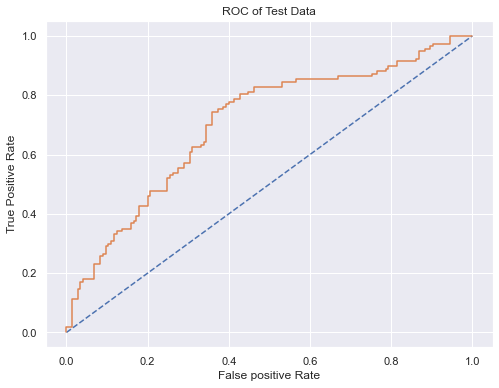

In [977]:
print('Fig. 37')
plt.figure(figsize=(8,6))
probs = RegModel.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False positive Rate')
plt.title('ROC of Test Data')
plt.show()

## Linear Discriminant Analysis

In [966]:
lda = LinearDiscriminantAnalysis()

In [967]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [968]:
y_train_pred = lda.predict(X_train)
y_test_pred = lda.predict(X_test)

### Train Data

In [979]:
print('Fig. 38\n')
print('Classification Report of Train Data')
print('')
print(classification_report(y_train, y_train_pred))
print('')
print('Confusion Matrix of Train Data')
confusion_matrix(y_train,y_train_pred)

Fig. 38

Classification Report of Train Data

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       326
           1       0.68      0.56      0.61       284

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.67       610


Confusion Matrix of Train Data


array([[252,  74],
       [126, 158]], dtype=int64)

### Test Data

In [980]:
print('Fig. 40\n')
print('Classification Report of Test Data')
print('')
print(classification_report(y_test, y_test_pred))
print('')
print('Confusion Matrix of Test Data')
confusion_matrix(y_test,y_test_pred)

Fig. 40

Classification Report of Test Data

              precision    recall  f1-score   support

           0       0.66      0.71      0.69       145
           1       0.61      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262


Confusion Matrix of Test Data


array([[103,  42],
       [ 52,  65]], dtype=int64)

In [981]:
param = {'solver': ['svd', 'lsqr', 'eigen'],
         'tol': [0.01, 0.001,0.0001, 0.00001]}

In [982]:
grid = GridSearchCV(estimator=lda, param_grid=param, verbose=True, n_jobs=-1, cv=3, scoring='recall')

In [983]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    4.7s finished


GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.01, 0.001, 0.0001, 1e-05]},
             scoring='recall', verbose=True)

In [984]:
grid.best_estimator_

LinearDiscriminantAnalysis(tol=0.01)

In [985]:
best_lda = LinearDiscriminantAnalysis(solver='svd', tol=0.01)

In [986]:
best_lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(tol=0.01)

In [987]:
y_train_pred = best_lda.predict(X_train)
y_test_pred = best_lda.predict(X_test)

In [988]:
confusion_matrix(y_train, y_train_pred)

array([[252,  74],
       [126, 158]], dtype=int64)

In [989]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       326
           1       0.68      0.56      0.61       284

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.67       610



In [990]:
confusion_matrix(y_test, y_test_pred)

array([[103,  42],
       [ 52,  65]], dtype=int64)

In [991]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.66      0.71      0.69       145
           1       0.61      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262



Fig. 39
AUC: 0.742


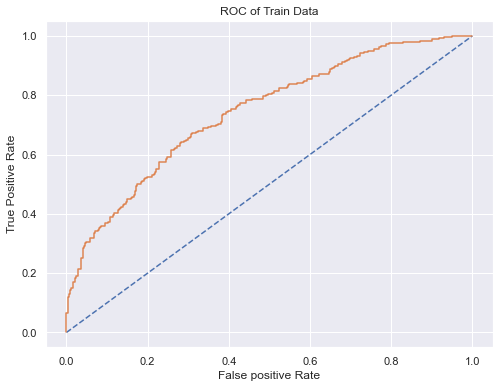

In [992]:
print('Fig. 39')
plt.figure(figsize=(8,6))
probs = best_lda.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False positive Rate')
plt.title('ROC of Train Data');

Fig. 41
AUC: 0.703


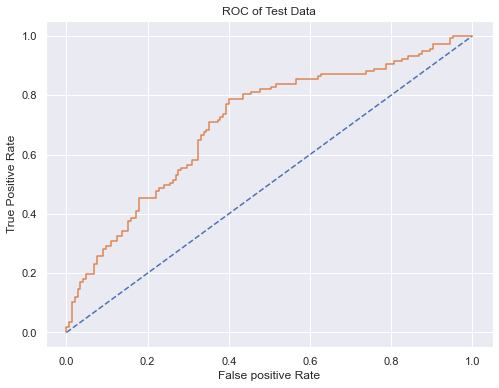

In [993]:
print('Fig. 41')
plt.figure(figsize=(8,6))
probs = best_lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False positive Rate')
plt.title('ROC of Test Data');

In [994]:
best_lda.score(X,y)

0.6628440366972477

In [995]:
best_lda.score(X_train,y_train)

0.6721311475409836

In [996]:
best_lda.score(X_test, y_test)

0.6412213740458015

In [997]:
roc_auc_score(y_train, y_train_pred)

0.6646720815691696

In [998]:
roc_auc_score(y_test, y_test_pred)

0.6329501915708813